In [66]:
import pandas as pd
import matplotlib.pyplot as plt
# In AAPL.ipynb
from stock_data import StockData
# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)
from dateutil import parser

from pandas.tseries.offsets import BDay

import seaborn as sns



## Load or download a data (AAPL)

In [67]:
# ============================================
# Download AAPL daily data for a year
# ============================================

ticker = "AAPL"

aapl_stock = StockData("AAPL", start_date="2009-02-14", end_date="2020-06-03")

df = aapl_stock.load_data()
df.head()



C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\stock_data.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.df = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2009-02-17,2.835053,2.910331,2.827556,2.905233,678238400
2009-02-18,2.830254,2.874641,2.780770,2.850648,684779200
2009-02-19,2.718387,2.826654,2.702492,2.800263,922804400
2009-02-20,2.735184,2.771173,2.669203,2.681200,750316000
2009-02-23,2.607721,2.759176,2.594525,2.748679,786982000


## Import or load the finest sentiment data


In [68]:
sentiment_df = pd.read_csv("../data/daily_sentiment.csv")

In [69]:
sentiment_df.sample(10)

,headline,url,publisher,date,stock,headline_length,TextBlob_Sentiment,TextBlob_Category
632091,Pingtan Marine Provides Update On Anti-Illegal...,https://www.benzinga.com/news/15/03/5355313/pi...,Hal Lindon,2015-03-25 00:00:00+00:00,PME,85,0.0,Neutral
639741,Roth Capital Upgrades CECO Environmental To Buy,https://www.benzinga.com/analyst-ratings/upgra...,Monica Gerson,2015-04-17 00:00:00+00:00,CECE,47,0.0,Neutral
491283,Five Star Stock Watch: Oracle Corporation,https://www.benzinga.com/news/earnings/14/03/4...,Christian Tharp CMT,2014-03-20 00:00:00+00:00,ORCL,41,0.0,Neutral
683030,Why This Gas ETF Is Getting Smoked,https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2015-08-06 00:00:00+00:00,SWN,34,0.0,Neutral
636552,Stephens &amp; Co. Initiates Coverage on Baker...,https://www.benzinga.com/news/15/04/5390148/st...,Hal Lindon,2015-04-08 00:00:00+00:00,BHI,88,0.0,Neutral
404374,"Gold Futures Drop Below $1,300 Per Ounce",https://www.benzinga.com/markets/commodities/1...,James Hunt,2013-06-20 00:00:00+00:00,GLD,40,0.0,Neutral
634917,"Benzinga's M&A Chatter for Wednesday April 1, ...",https://www.benzinga.com/news/15/04/5377485/be...,Charles Gross,2015-04-01 00:00:00+00:00,RCPT,50,0.0,Neutral
1159389,"JP Morgan Downgrades NCR to Neutral, Announces...",https://www.benzinga.com/news/19/03/13415003/j...,Vick Meyer,2019-03-25 00:00:00+00:00,NCR,50,0.0,Neutral
465564,Option Alert: Palo Alto Networks March $60 Cal...,https://www.benzinga.com/markets/options/14/01...,Charles Gross,2014-01-03 00:00:00+00:00,PANW,114,0.0,Neutral
105395,Invesco Outpaces Earnings Ests - Analyst Blog,https://www.benzinga.com/11/01/814219/invesco-...,webmaster,2011-01-27 00:00:00+00:00,MS,45,0.0,Neutral


# 1. Data profiling

In [70]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'TSLA')), flatten them

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()




Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


# - Summary Statistics 

In [71]:


aapl_stock.inspect_data()




📌 Dataset Shape for AAPL: (2843, 6)

📌 First 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2009-02-17,2.835053,2.910331,2.827556,2.905233,678238400,AAPL
2009-02-18,2.830254,2.874641,2.780770,2.850648,684779200,AAPL
2009-02-19,2.718387,2.826654,2.702492,2.800263,922804400,AAPL
2009-02-20,2.735184,2.771173,2.669203,2.681200,750316000,AAPL
2009-02-23,2.607721,2.759176,2.594525,2.748679,786982000,AAPL



📌 Last 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2020-05-27,77.143799,77.289304,75.926418,76.666068,112945200,AAPL
2020-05-28,77.177750,78.436360,76.542383,76.818837,133560800,AAPL
2020-05-29,77.102570,77.881014,76.746084,77.420253,153532400,AAPL
2020-06-01,78.050781,78.172035,76.925547,77.056502,80791200,AAPL
2020-06-02,78.412102,78.436354,77.342646,77.784010,87642800,AAPL



📌 Random 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2018-02-15,40.678013,40.701525,39.739777,39.925541,204588800,AAPL
2009-12-22,6.009003,6.023699,5.958018,5.981412,349515600,AAPL
2013-02-20,13.660178,13.929212,13.658655,13.929212,476302400,AAPL
2014-11-21,25.820431,26.064291,25.722886,26.050990,228717200,AAPL
2017-11-20,39.807930,39.943762,39.709570,39.880529,65049600,AAPL



📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2843 entries, 2009-02-17 to 2020-06-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2843 non-null   float64
 1   High    2843 non-null   float64
 2   Low     2843 non-null   float64
 3   Open    2843 non-null   float64
 4   Volume  2843 non-null   int64  
 5   Ticker  2843 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 155.5+ KB


In [72]:




aapl_stock.check_missing_values()




📌 Missing values per column:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

📌 Columns with >5% missing values:
✔️ None

📌 Total rows with missing values in key columns ['Close', 'Open', 'High', 'Volume']: 0
✔️ No missing rows in key columns

📌 Duplicate rows: 0

📌 Cardinality (categoricals): {'Ticker': 1}


In [73]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
Price        Close         High          Low         Open        Volume
count  2843.000000  2843.000000  2843.000000  2843.000000  2.843000e+03
mean     25.201360    25.432607    24.949233    25.186182  3.131657e+08
std      16.823482    16.984332    16.630913    16.784663  2.368947e+08
min       2.492556     2.627216     2.469163     2.524647  4.544800e+07
25%      12.093890    12.217454    11.941734    12.051602  1.296272e+08
50%      21.689699    21.875814    21.426079    21.634195  2.408320e+08
75%      35.793745    36.014809    35.569265    35.795785  4.328996e+08
max      79.133965    79.138799    78.202853    78.539019  1.880998e+09


In [74]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
Price  Ticker
count    2843
unique      1
top      AAPL
freq     2843


In [75]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
Price         Close         High          Low         Open        Volume  \
count   2843.000000  2843.000000  2843.000000  2843.000000  2.843000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      25.201360    25.432607    24.949233    25.186182  3.131657e+08   
std       16.823482    16.984332    16.630913    16.784663  2.368947e+08   
min        2.492556     2.627216     2.469163     2.524647  4.544800e+07   
25%       12.093890    12.217454    11.941734    12.051602  1.296272e+08   
50%       21.689699    21.875814    21.426079    21.634195  2.408320e+08   
75%       35.793745    36.014809    35.569265    35.795785  4.328996e+08   
max       79.133965    79.138799    78.202853    78.539019  1.880998e+09   

Price  Ticker  
count    2843  
unique      1  
top    

In [76]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [77]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Ticker': 1}


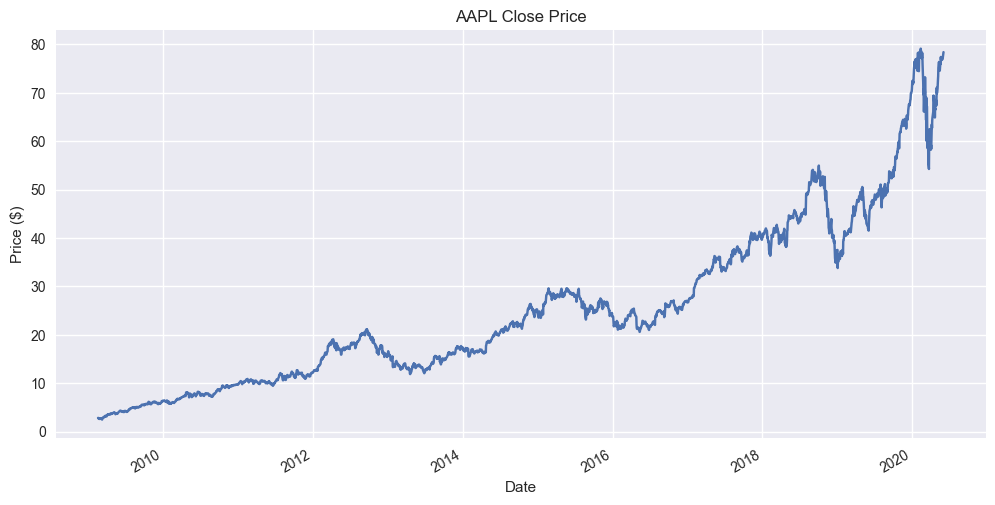

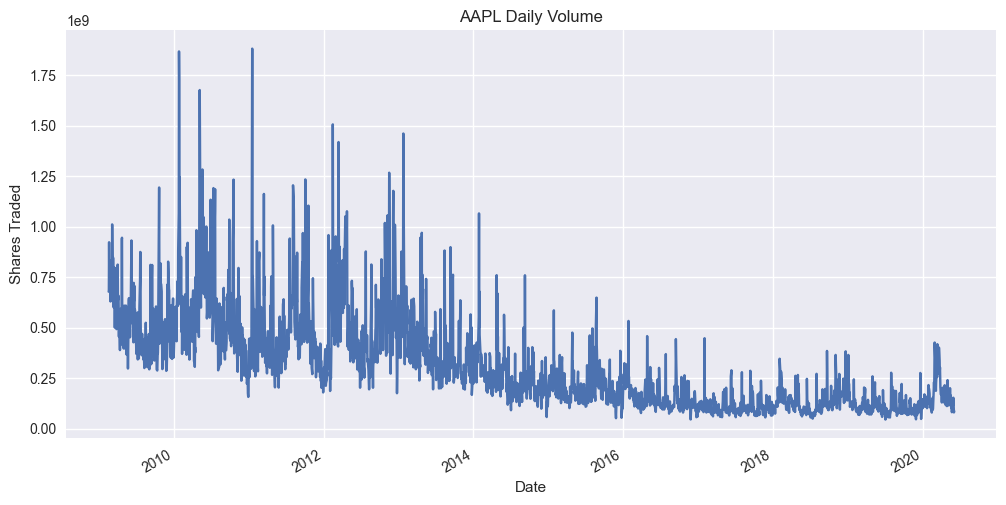

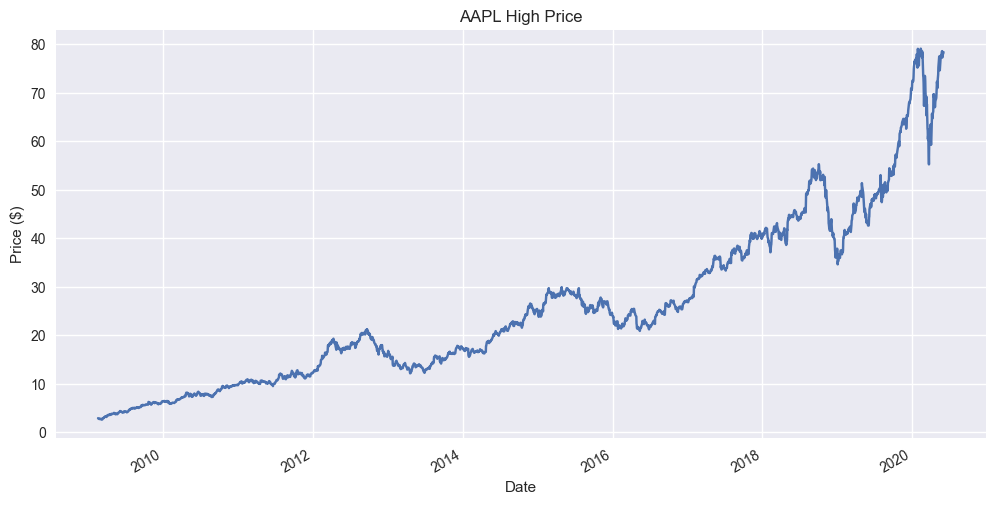

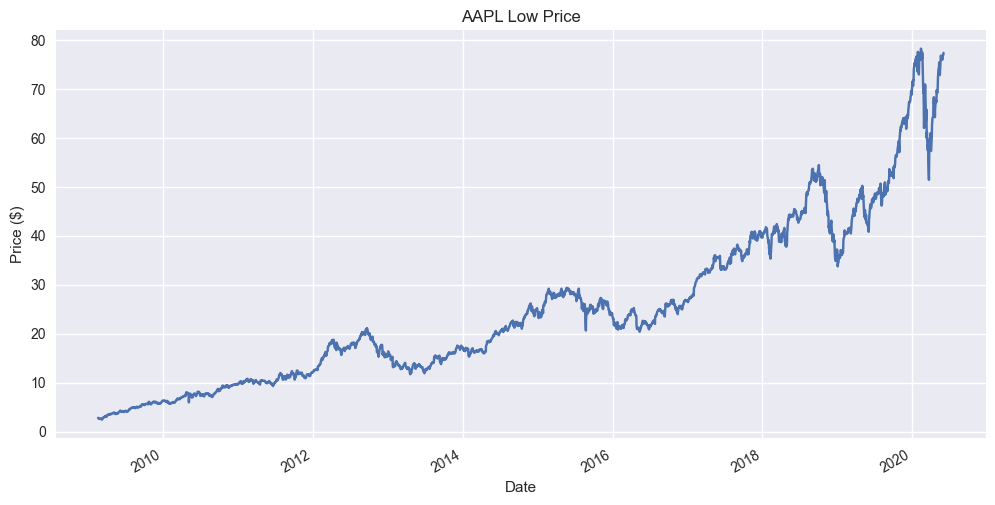

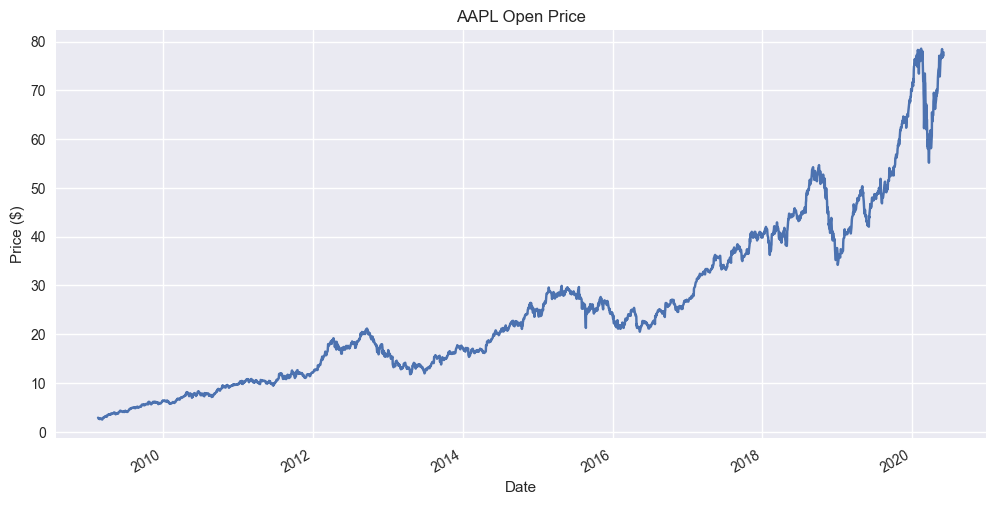

In [78]:

aapl_stock.plot_price()

## Stock price over time

## Key Growth Phases and Periods of Volatility
- Early Rapid Growth (2010 - 2012): The price experiences a steep climb from $2-$3 up to around $20. This suggests a period of significant positive market sentiment and company performance.

- Correction and Consolidation (2012 - 2014): Following the initial surge, the price experiences a significant correction (a drop from the highs), hovering in the $10-$20 range for a couple of years. This phase represents a period of consolidation before the next major move.

- Steadier Growth (2014 - 2018): The price begins another strong upward trajectory, moving from the $20 range up to approximately $55-$60. This growth is generally smoother than the initial phase, indicating consistent, sustained demand.

- The Final Surge and High Volatility (2018 - Early 2020): This period shows a notable increase in volatility and the steepness of the climb. The price reaches new highs, surging from around $40 up to the final peak near $80. There are several sharp drops and subsequent recoveries during this time, particularly noticeable in late 2018 and the period preceding the final climb.

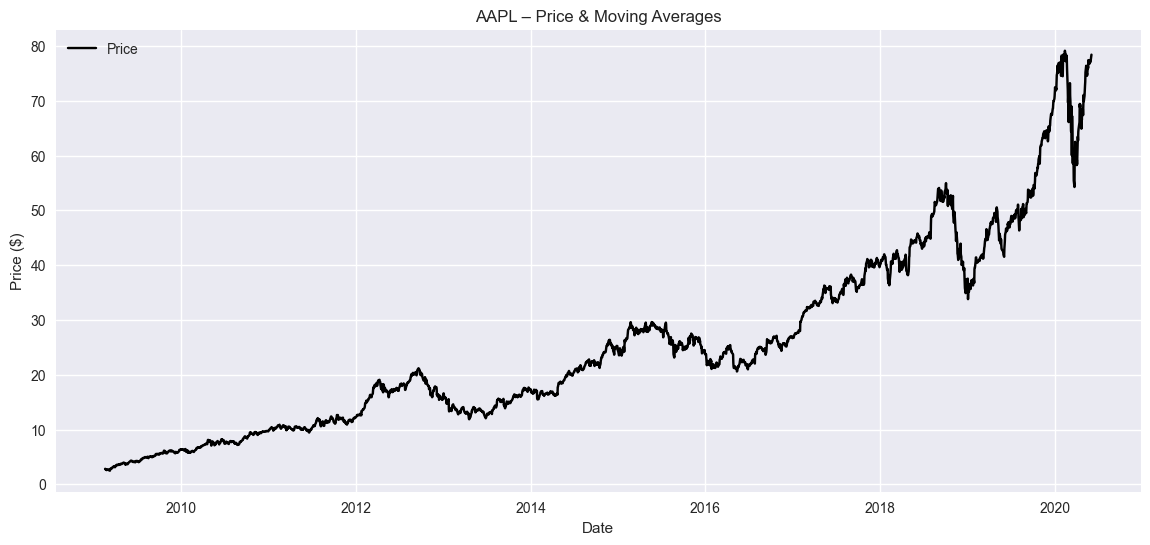

In [79]:
aapl_stock.plot_price_sma()


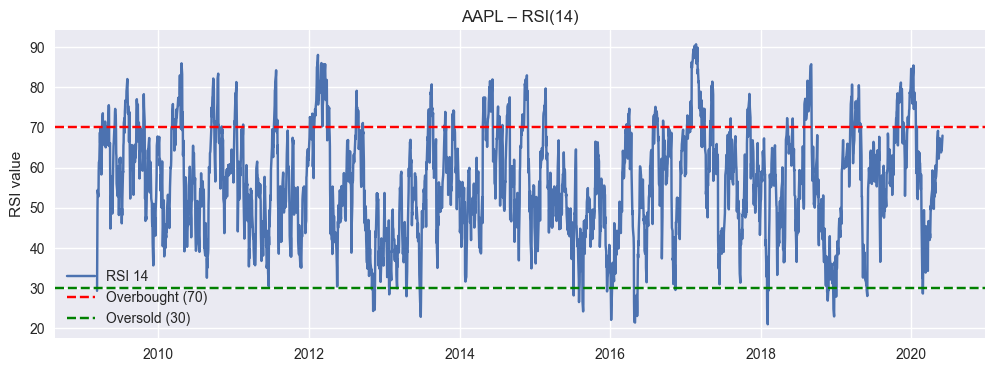

In [80]:



aapl_stock.plot_rsi()



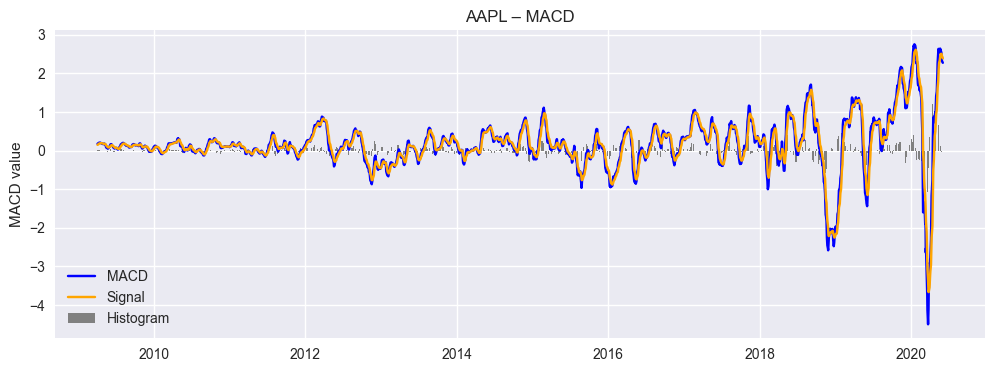

In [81]:
aapl_stock.plot_macd()


## Interpretation of the Moving Averages
- Long-Term Growth: The price increased dramatically from approximately $2 to $80 (after adjusting for the 2014 split). This signifies huge long-term appreciation.

- Moving Averages (MAs): The technical indicators overwhelmingly confirmed this trend. The shorter-term MA (Blue) remained above the longer-term MA (Red) for almost the entire period.

- This MA relationship is the classic sign of a strong bull market.

- The MAs frequently served as dynamic support, with the price often dropping to these lines during pullbacks before bouncing higher.

## Interpretation of AAPL Relative Strength Index 
- The primary use of the RSI is to identify when a stock's price movement is getting stretched to an extreme, signaling potential price weakness or strength.

- Overbought Territory (RSI > 70): The asset has risen too far, too fast, and a temporary pullback or reversal may be imminent.

- Oversold Territory (RSI < 30): The asset has fallen too far, too fast, and a rebound or reversal may be imminent.

- Neutral Zone (RSI between 30 and 70): Indicates no extreme momentum bias. The 50 level is often seen as the center line; movement above 50 suggests a bullish bias, and below 50 suggests a bearish bias.

## Interpretation of AAPL MACD
- The MACD chart confirms the strong long-term momentum of AAPL stock from 2010 to 2020.

- Bullish Trend Confirmation: The MACD line is mostly above the zero line, indicating a sustained bullish environment.

- Buying Signals: Frequent bullish crossovers (MACD line crosses above the Signal line) signaled surges in momentum, especially after price pullbacks.

- Volatility: The size of the MACD swings increased sharply toward 2020, confirming the rising price volatility observed in the main chart.

In [82]:
df.head()


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2009-02-17,2.835053,2.910331,2.827556,2.905233,678238400,AAPL
2009-02-18,2.830254,2.874641,2.780770,2.850648,684779200,AAPL
2009-02-19,2.718387,2.826654,2.702492,2.800263,922804400,AAPL
2009-02-20,2.735184,2.771173,2.669203,2.681200,750316000,AAPL
2009-02-23,2.607721,2.759176,2.594525,2.748679,786982000,AAPL


In [83]:

def safe_parse_with_utc(date_val):
    try:
        dt = parser.parse(str(date_val), dayfirst=False)  # adjust dayfirst if your dataset is DD-MM-YYYY
        return pd.Timestamp(dt, tz='UTC')
    except:
        return pd.NaT

if 'date' in df.columns:
    df['date'] = df['date'].astype(str).str.strip()
    df['date'] = df['date'].apply(safe_parse_with_utc)
    
    if df['date'].isnull().any():
        print("Warning: Some dates could not be parsed and are set as NaT.")
    
    df = df.sort_values('date').reset_index(drop=True)
    
    print(df['date'].head())
    print(f"Data type: {df['date'].dtype}")


In [84]:
df.head()

Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2009-02-17,2.835053,2.910331,2.827556,2.905233,678238400,AAPL
2009-02-18,2.830254,2.874641,2.780770,2.850648,684779200,AAPL
2009-02-19,2.718387,2.826654,2.702492,2.800263,922804400,AAPL
2009-02-20,2.735184,2.771173,2.669203,2.681200,750316000,AAPL
2009-02-23,2.607721,2.759176,2.594525,2.748679,786982000,AAPL


In [85]:
print(sentiment_df.columns.tolist())


['headline', 'url', 'publisher', 'date', 'stock', 'headline_length', 'TextBlob_Sentiment', 'TextBlob_Category']


In [86]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.strftime('%Y-%m-%d')


In [87]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [88]:
sentiment_df.head()


,headline,url,publisher,date,stock,headline_length,TextBlob_Sentiment,TextBlob_Category
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14,NAV,28,0.0,Neutral
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27,Y,45,0.0,Neutral
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27,FT,45,0.0,Neutral
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29,A,22,0.0,Neutral
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22,AM,49,0.0,Neutral


In [89]:
sentiment_df[sentiment_df['stock'] == 'AAPL']


,headline,url,publisher,date,stock,headline_length,TextBlob_Sentiment,TextBlob_Category
1310747,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09,AAPL,91,-0.466667,Negative
1310749,101 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,2020-03-09,AAPL,45,0.000000,Neutral
1310955,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09,AAPL,46,0.000000,Neutral
1311533,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/03/15515009/s...,luke@benzinga.com,2020-03-10,AAPL,239,0.097000,Positive
1311534,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10,AAPL,55,0.000000,Neutral
...,...,...,...,...,...,...,...,...
1351200,Hearing Susquehanna Check Suggests Total iPhon...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-02,AAPL,119,-0.100000,Negative
1351201,Tesla CEO Musk Says Other Three Officers Shoul...,https://www.benzinga.com/news/20/06/16156648/t...,Neer Varshney,2020-06-02,AAPL,81,-0.125000,Negative
1351202,A Peek Into The Markets: US Stock Futures Up; ...,https://www.benzinga.com/news/earnings/20/06/1...,Lisa Levin,2020-06-02,AAPL,69,-0.700000,Negative
1351203,"Pepper Spray, Books On Racism, 'I Can't Breath...",https://www.benzinga.com/news/20/06/16156515/p...,Neer Varshney,2020-06-02,AAPL,103,0.500000,Positive


In [90]:
# Ensure the index is datetime
df.index = pd.to_datetime(df.index)

# Get starting date
start_date = df.index.min()

# Get ending date
end_date = df.index.max()

print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 2009-02-17 00:00:00
End Date: 2020-06-02 00:00:00


In [91]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
start_date = sentiment_df['date'].min()
end_date = sentiment_df['date'].max()
print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 2009-02-14 00:00:00
End Date: 2020-06-03 00:00:00



Pearson Correlation:
                     return  daily_sentiment  lagged_sentiment
return            1.000000         0.104486         -0.165145
daily_sentiment   0.104486         1.000000         -0.039985
lagged_sentiment -0.165145        -0.039985          1.000000

Spearman Correlation:
                     return  daily_sentiment  lagged_sentiment
return            1.000000         0.133602         -0.188052
daily_sentiment   0.133602         1.000000          0.075035
lagged_sentiment -0.188052         0.075035          1.000000

Kendall Correlation:
                     return  daily_sentiment  lagged_sentiment
return            1.000000         0.094460         -0.104148
daily_sentiment   0.094460         1.000000          0.051515
lagged_sentiment -0.104148         0.051515          1.000000


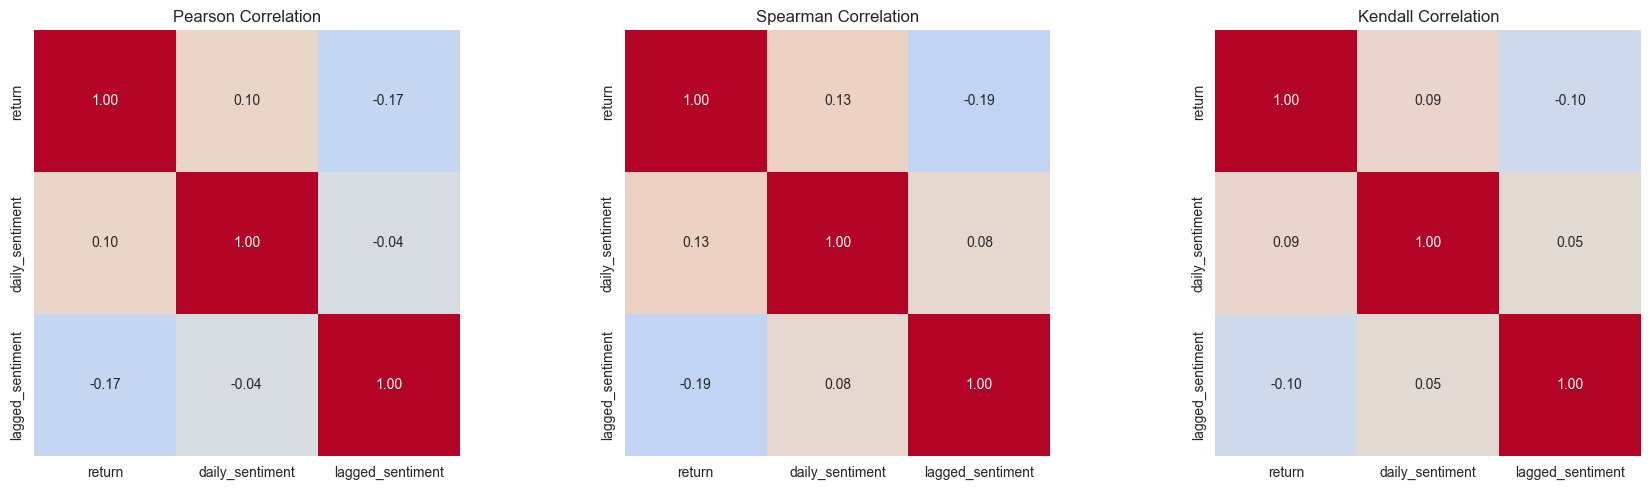

In [92]:


# -------------------------------
# 1. FILTER NEWS FOR AAPL ONLY
# -------------------------------
sentiment_df = sentiment_df[sentiment_df['stock'] == "AAPL"].copy()
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# -------------------------------
# 2. PREPARE STOCK DATA
# -------------------------------
# Ensure stock dataframe index is datetime
df.index = pd.to_datetime(df.index)

# -------------------------------
# 3. ALIGN NEWS DATES TO NEXT TRADING DAY
# -------------------------------
stock_dates = df.index

def align_to_next_trading_day(news_date):
    future_dates = stock_dates[stock_dates >= news_date]
    if len(future_dates) == 0:
        return None
    return future_dates[0]

sentiment_df['aligned_date'] = sentiment_df['date'].apply(align_to_next_trading_day)
sentiment_df = sentiment_df.dropna(subset=['aligned_date'])

# -------------------------------
# 4. AGGREGATE DAILY SENTIMENT
# -------------------------------
daily_sentiment = (
    sentiment_df.groupby('aligned_date')['TextBlob_Sentiment']
    .mean()
    .to_frame('daily_sentiment')
)

# Create lagged sentiment (previous day's sentiment)
daily_sentiment['lagged_sentiment'] = daily_sentiment['daily_sentiment'].shift(1)

# -------------------------------
# 5. CALCULATE DAILY STOCK RETURNS
# -------------------------------
df['return'] = df['Close'].pct_change()

# -------------------------------
# 6. MERGE STOCK + SENTIMENT
# -------------------------------
merged_df = df.merge(
    daily_sentiment,
    left_index=True,
    right_index=True,
    how='left'
)

# -------------------------------
# 7. CORRELATION ANALYSIS
# -------------------------------
# Drop NaNs for correlation calculation
df_corr = merged_df[['return', 'daily_sentiment', 'lagged_sentiment']].dropna()

corr_methods = {
    "Pearson": df_corr.corr(method="pearson"),
    "Spearman": df_corr.corr(method="spearman"),
    "Kendall": df_corr.corr(method="kendall"),
}

# Print correlations
for name, corr in corr_methods.items():
    print(f"\n{name} Correlation:\n", corr)

# -------------------------------
# 8. VISUALIZATION
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (title, corr) in zip(axes, corr_methods.items()):
    sns.heatmap(
        corr,
        ax=ax,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        annot=True,
        fmt=".2f",
        square=True,
        cbar=False
    )
    ax.set_title(f"{title} Correlation")

fig.tight_layout()
plt.show()


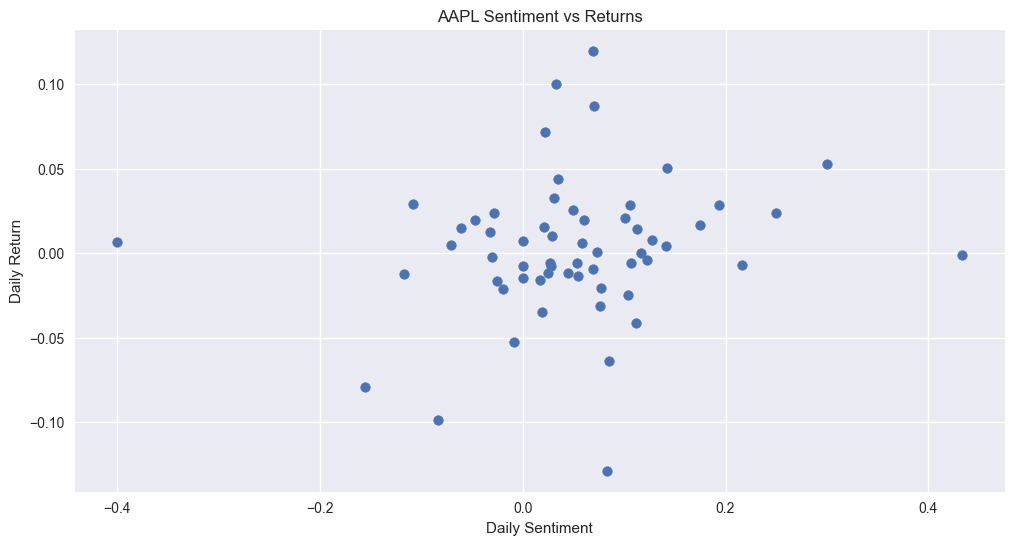

In [93]:


plt.scatter(merged_df['daily_sentiment'], merged_df['return'])
plt.xlabel("Daily Sentiment")
plt.ylabel("Daily Return")
plt.title("AAPL Sentiment vs Returns")
plt.show()


## Interpretation of Correlation Results
- The matrices show the correlation coefficients, which measure the strength and direction of a linear or monotonic relationship between two variables.

1. 📊 Pearson Correlation (Linear Relationship)The Pearson method measures the strength of the linear relationship between variables.

- return vs. daily_sentiment (0.10): This is a weak positive correlation. It suggests that on the same day the stock market has a positive return, the sentiment tends to be slightly more positive, and vice-versa. This is often interpreted as investor sentiment reacting to market movement, not driving it.

- return vs. lagged_sentiment (-0.17): This is a weak negative correlation. This is the most interesting result for prediction. It suggests that a more positive sentiment from yesterday (lagged) is associated with a slightly negative return today, and a negative sentiment from yesterday is associated with a slightly positive return today. This is a potential sign of a very weak contrarian effect (meaning, when sentiment is high, the stock might be overbought and fall the next day).

- daily_sentiment vs. lagged_sentiment (-0.04): Almost no linear relationship. Sentiment from one day is almost independent of the sentiment from the previous day.

2.  Spearman and Kendall Correlation (Monotonic Relationship)- These methods measure the strength of a monotonic (directional) relationship, which is useful because the relationship between sentiment and returns might not be perfectly linear. The overall pattern remains the same across these two methods, confirming the general weak relationships observed in Pearson.
- return vs. daily_sentiment (Spearman: 0.13, Kendall: 0.09): Still a weak positive correlation.

- return vs. lagged_sentiment (Spearman: -0.19, Kendall: -0.10): The weak negative relationship between yesterday's sentiment and today's return is consistent, and even slightly stronger in the Spearman coefficient ($0.19$).

- 🔑 Key Takeaways

1. Sentiment is Reactive (Daily): The largest positive correlation is between return and daily_sentiment ($0.10$ to $0.13$). This suggests that investors tend to express positive sentiment after the stock has already gone up, rather than before.
2. Weak Contrarian Signal (Lagged): The lagged_sentiment has a consistent, albeit weak, negative correlation with return ($-0.17$ to $-0.19$). This is often a characteristic of short-term market inefficiency, where excessive optimism (positive lagged sentiment) is followed by a slight price correction (negative return).

3. Overall Relationship: In all three correlation methods, the coefficients are quite small (all are between $0.09$ and $0.19$ in magnitude). This indicates that sentiment alone is a very weak predictor of stock returns and is generally not strongly correlated with market movement in this dataset.

## Interpretation of the Scatter Plot
- No Predictable Pattern: The data points are highly scattered across the plot . There is no visible line or curve that the majority of points follow, which means that Daily Sentiment (X-axis) is not a reliable linear predictor of the Daily Return (Y-axis). This validates the very low correlation coefficients you observed earlier.

- Central Clustering: Most data points cluster around the center, close to the 0.0 mark on both axes.

- Sentiment: Most days had a sentiment score near neutral (close to 0.0).

- Returns: Most days saw relatively small price changes (close to 0.0 return).

- Reactive Behavior (Outliers): While there's no overall pattern, the outliers suggest the market moves first and sentiment follows:

- An extremely high positive return (near the top of the plot) is associated with only a slightly positive sentiment, indicating the stock went up before sentiment fully registered.

- A significant price drop (near the bottom of the plot) is associated with positive sentiment, which could indicate a brief moment of investor optimism immediately before a sharp market correction.